# Previsão de renda

### 4 elementos importantes
- Esse notebook
- Streamlit com as análises
- Seu Github com o projeto
- Vídeo no readme do github mostrando o streamlit

## Etapa 1 CRISP - DM: Entendimento do negócio

<span style="color:red">ESCREVER AQUI</span>


## Etapa 2 Crisp-DM: Entendimento dos dados
<span style="color:red">ESCREVER AQUI</span>


### Dicionário de dados

<span style="color:red">ESCREVER AQUI</span>


| Variável                | Descrição                                           | Tipo         |
| ----------------------- |:---------------------------------------------------:| ------------:|
| data_ref                |  Data de referência da coleta das variáveis                                     |texto|
| id_cliente              |  Código de identificação                                      |inteiro|
| sexo                    |  M = 'Masculino'; F = 'Feminino'                                      |M/F|
| posse_de_veiculo        |  True = 'possui'; False = 'não possui'                                      |booleano|
| posse_de_imovel         |  True = 'possui'; False = 'não possui'                                      |booleano|
| qtd_filhos              |  Quantidade de filhos                                      |inteiro|
| tipo_renda              |  Tipo de renda (ex: assalariado, empresário, etc)                                      |texto|
| educacao                |  Grau de instrução (ex: secundário, superior, etc)                                      |texto|
| estado_civil            |  Estado civil (ex: solteiro, casado, etc)                                      |texto|
| tipo_residencia         |  Tipo de residência (ex: casa, governamental, etc)                                      |texto|
| idade                   |  Idade em anos                                      |inteiro|
| tempo_emprego           |  Tempo de emprego em anos                                      |numérica|
| qt_pessoas_residencia   |  Quantidade de pessoas que moram na residência                                      |inteiro|
| **renda**                  |  Renda mensal em reais                                     |numérica|





#### Carregando os pacotes
É considerado uma boa prática carregar os pacotes que serão utilizados como a primeira coisa do programa.

<span style="color:red">ESCREVER AQUI</span>


#### Carregando os dados
O comando pd.read_csv é um comando da biblioteca pandas (pd.) e carrega os dados do arquivo csv indicado para um objeto *dataframe* do pandas.

<span style="color:red">ESCREVER AQUI</span>


In [2]:
import pandas as pd
#from pandas_profiling import ProfileReport
from ydata_profiling import ProfileReport

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import graphviz

In [3]:
renda = pd.read_csv('./input/previsao_de_renda.csv')

In [4]:
print("Número de linhas da tabela: {}".format(renda.shape[0]))
print("Número de colunas da tabela: {}".format(renda.shape[1]))

renda.head()

Número de linhas da tabela: 15000
Número de colunas da tabela: 15


,Unnamed: 0,data_ref,id_cliente,sexo,posse_de_veiculo,posse_de_imovel,qtd_filhos,tipo_renda,educacao,estado_civil,tipo_residencia,idade,tempo_emprego,qt_pessoas_residencia,renda
0,0,2015-01-01,15056,F,False,True,0,Empresário,Secundário,Solteiro,Casa,26,6.602740,1.0,8060.34
1,1,2015-01-01,9968,M,True,True,0,Assalariado,Superior completo,Casado,Casa,28,7.183562,2.0,1852.15
2,2,2015-01-01,4312,F,True,True,0,Empresário,Superior completo,Casado,Casa,35,0.838356,2.0,2253.89
3,3,2015-01-01,10639,F,False,True,1,Servidor público,Superior completo,Casado,Casa,30,4.846575,3.0,6600.77
4,4,2015-01-01,7064,M,True,False,0,Assalariado,Secundário,Solteiro,Governamental,33,4.293151,1.0,6475.97


#### Entendimento dos dados - Univariada
Nesta etapa tipicamente avaliamos a distribuição de todas as variáveis. 

Primeiramente, será gerado um html onde estão presentes as análises univariadas de todas as variáveis presentes na tabela renda.

In [5]:
prof = ProfileReport(renda, explorative=True, minimal=True)
prof

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [6]:
prof.to_file('./output/renda_analisys.html')

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

Para facilitar a visualização das análises, serão gerados gráficos e descrições de cada variável nas próximas linhas deste notebook, com excessão das colunas 'Unnamed: 0' e 'id_cliente', uma vez que estas não devem trazer informações relevantes em análises univariadas.

Começando com a variável resposta 'renda', que por ser uma variável contínua, sua análise será através de um histograma e boxplot.

##### 'renda'.

count     15000.000000
mean       5697.287057
std        8266.816289
min         118.710000
25%        2026.110000
50%        3499.720000
75%        6392.167500
max      245141.670000
Name: renda, dtype: float64

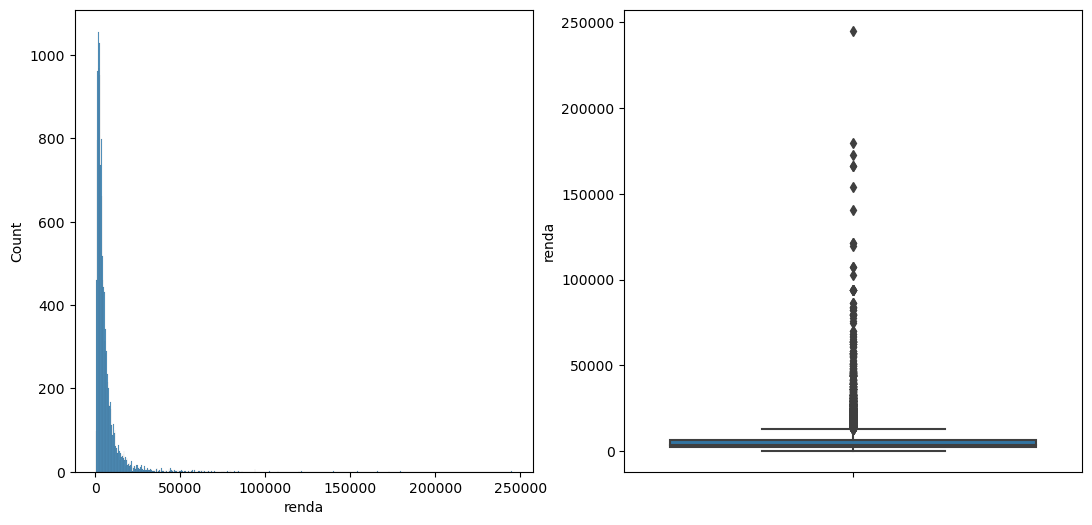

In [7]:
plt.rc('figure', figsize=(13, 6))
fig, axes = plt.subplots(1, 2)

ax0 = axes[0]
sns.histplot(x='renda', data=renda, ax = ax0)

ax1 = axes[1]
sns.boxplot(y='renda', data=renda, ax = ax1)

renda['renda'].describe()

De acordo com a descrição, a renda média dos clientes é de, aproximadamente, 5697(8267) reais, com a mediana em torno de 3500 reais. Considerando que a distância interquartil dessa variável é 6392.1675 - 2026.1100 = 4366.0575, os valores acima de 6392.1675 + 1.5 x 4366.0575 = 12941.2537 são possíveis outliers.

##### 'tempo_emprego'.

count    12427.000000
mean         7.722635
std          6.711189
min          0.117808
25%          2.973973
50%          6.013699
75%         10.120548
max         42.906849
Name: tempo_emprego, dtype: float64

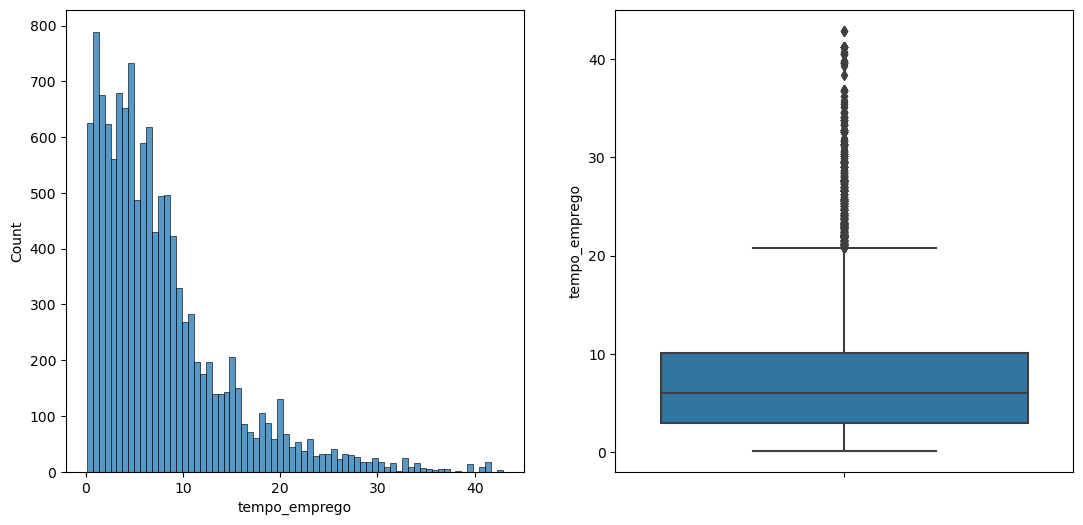

In [8]:
plt.rc('figure', figsize=(13, 6))
fig, axes = plt.subplots(1, 2)

ax0 = axes[0]
sns.histplot(x='tempo_emprego', data=renda, ax = ax0)

ax1 = axes[1]
sns.boxplot(y='tempo_emprego', data=renda, ax = ax1)

renda['tempo_emprego'].describe()

A média do tempo de emprego das pessoas em questão é próximo de 7(6) anos. Além disso, verifica-se que a maior parte das pessoas tem tempo de emprego entre 3 e 10 anos. Há possíveis outliers acima dos 20 anos de emprego.

##### 'idade'.

count    15000.000000
mean        43.882333
std         11.273155
min         22.000000
25%         34.000000
50%         43.000000
75%         53.000000
max         68.000000
Name: idade, dtype: float64

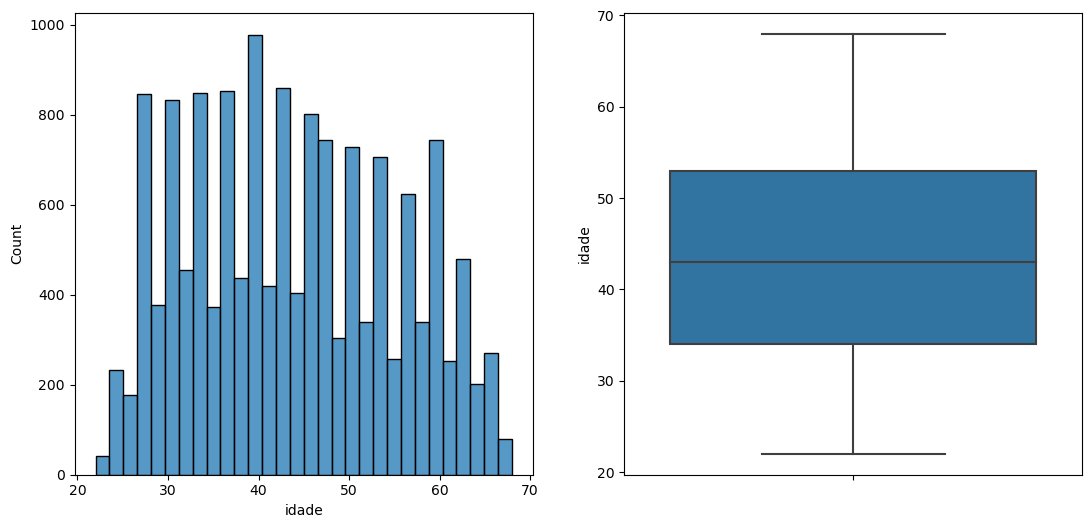

In [9]:
plt.rc('figure', figsize=(13, 6))
fig, axes = plt.subplots(1, 2)

ax0 = axes[0]
sns.histplot(x='idade', data=renda, ax = ax0)

ax1 = axes[1]
sns.boxplot(y='idade', data=renda, ax = ax1)

renda['idade'].describe()

A média das idades dos clientes é de 43(11) anos. É notável que a maior parte deles estão entre 34 e 53 anos.

##### 'qtd_filhos'.

<AxesSubplot:xlabel='qtd_filhos', ylabel='count'>

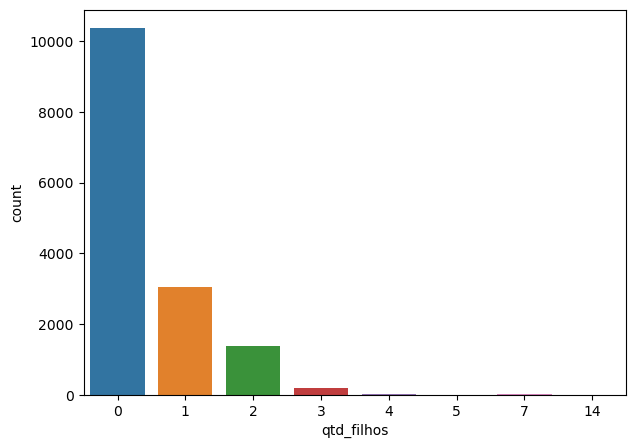

In [10]:
plt.rc('figure', figsize=(7, 5))

sns.countplot(x='qtd_filhos', data=renda)


A maior parte das pessoas analisadas não têm filhos.

##### 'qt_pessoas_residencia'.

<AxesSubplot:xlabel='qt_pessoas_residencia', ylabel='count'>

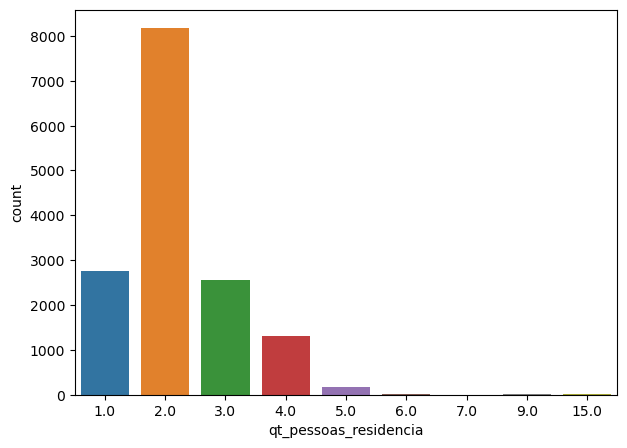

In [11]:
plt.rc('figure', figsize=(7,5))

sns.countplot(x='qt_pessoas_residencia', data=renda)

Em geral, os frequentadores deste banco moram em conjunto com mais uma pessoa. Por outro, a quantidade de pessoas que moram sozinhas é muito semelhante à das que moram com mais duas pessoas.

##### 'data_ref'.

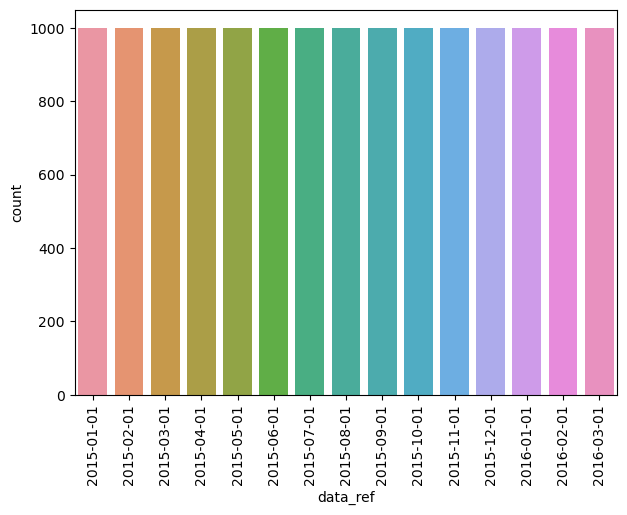

In [12]:
plt.rc('figure', figsize=(7,5))

datas = sns.countplot(x='data_ref', data=renda)
datas.tick_params(axis='x', rotation=90)

Os dados desta planilha foram tomados entre janeiro de 2015 a março de 2016, sem que haja uma data dominate entre eles.

##### 'sexo'.

<AxesSubplot:xlabel='sexo', ylabel='count'>

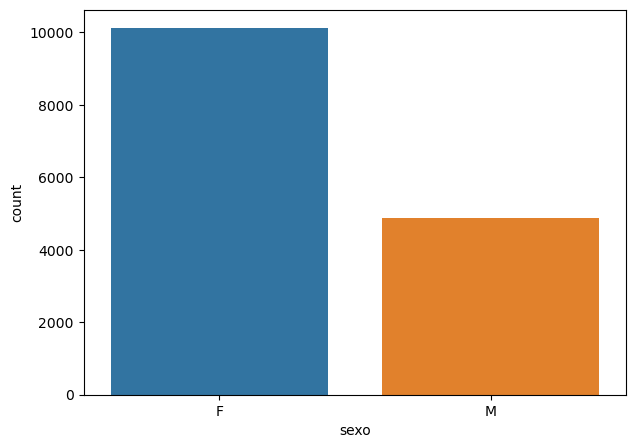

In [13]:
sns.countplot(x='sexo', data=renda)

Verifica-se uma predominância de clientes do sexo feminino.

##### 'posse_de_veiculo'.

<AxesSubplot:xlabel='posse_de_veiculo', ylabel='count'>

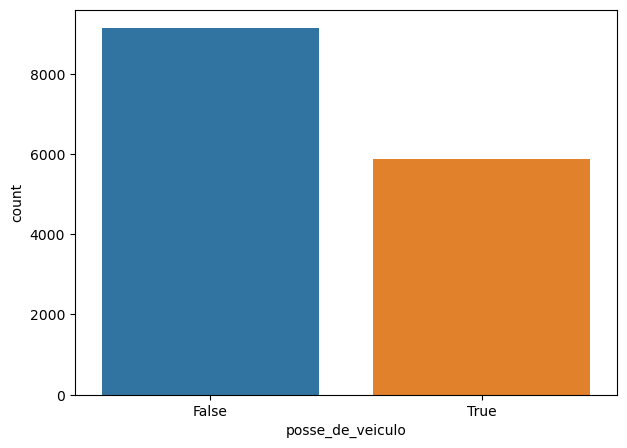

In [14]:
sns.countplot(x='posse_de_veiculo', data=renda)

A maior parte dos clientes não possuem veículo.

##### 'posse_de_imovel'.

<AxesSubplot:xlabel='posse_de_imovel', ylabel='count'>

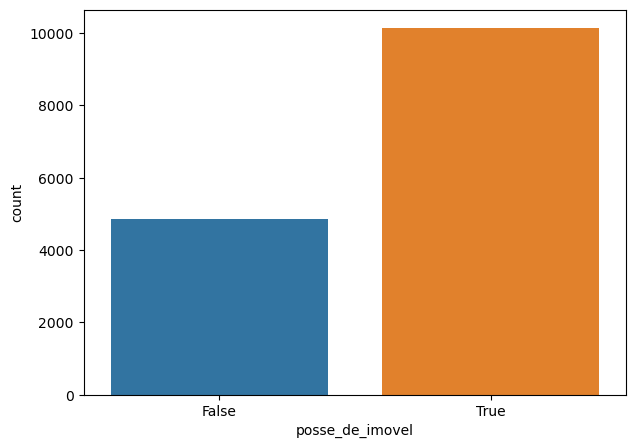

In [15]:
sns.countplot(x='posse_de_imovel', data=renda)

Por outro lado, a quantidade de pessoas que possuem imóvel é quase o dobro das que não possuem.

##### 'tipo_renda'.

<AxesSubplot:xlabel='tipo_renda', ylabel='count'>

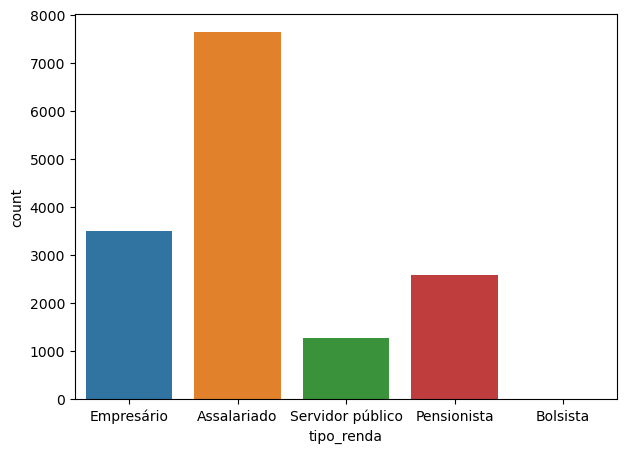

In [16]:
sns.countplot(x='tipo_renda', data=renda)

O tipo de renda predominante é a de trabalhadores assalariados. Enquanto que quase não há bolsistas no conjunto analisado.

##### 'educacao'.

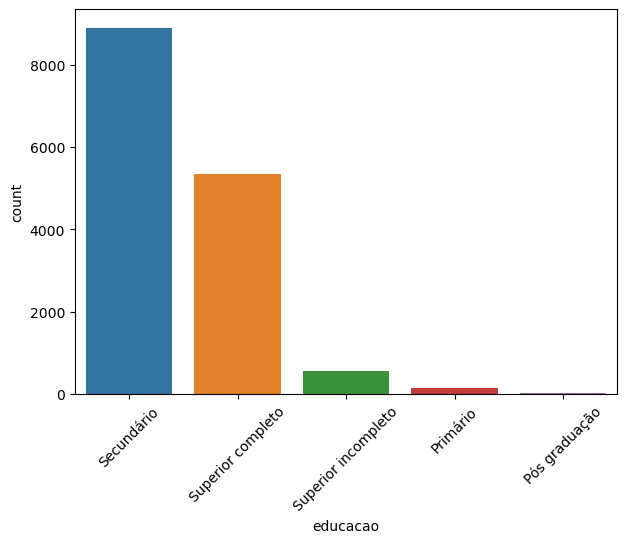

In [17]:
educ = sns.countplot(x='educacao', data=renda)
educ.tick_params(axis='x', rotation=45)

Verifica-se que a maior parte das pessoas possui a educação no nível secundário, seguido pelos que possuem terminaram o nível superior. 

##### 'estado_civil'.

<AxesSubplot:xlabel='estado_civil', ylabel='count'>

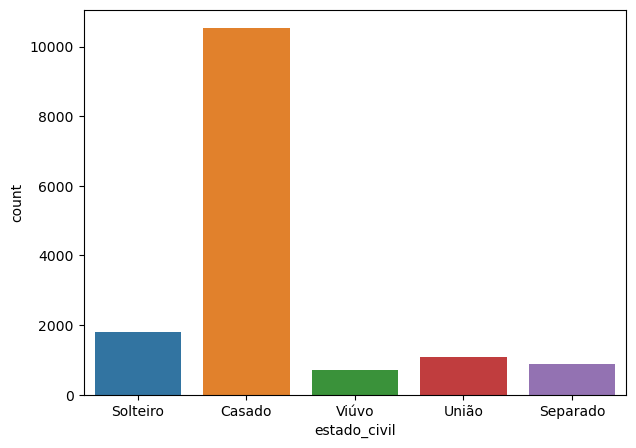

In [18]:
sns.countplot(x='estado_civil', data=renda)

A maior parte dos cliente são casados, enquanto entre os estados civis restantes, percebe-se um leve predomínio dos solteiros.

##### 'tipo_residencia'.

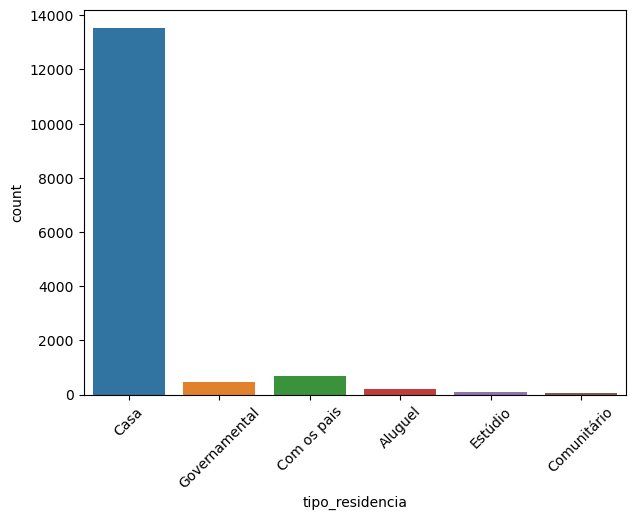

In [19]:
resid = sns.countplot(x='tipo_residencia', data=renda)
resid.tick_params(axis='x', rotation=45)

Há um claro predomínio de residências do tipo casa, de forma que quase não são notadas diferenças entre as quantidades dos outros tipos.

### Entendimento dos dados - Bivariadas




Nesta seção serão realizadas as análises bivariadas da variável resposta 'renda' em função das variáveis explicativas, com excessão das variáveis 'id_cliente' e 'Unnamed: 0'. No caso das variaveis quantitativas, serão verificadas as correlações entre elas e a variável resposta 'renda'. Para as variáveis qualitativas, veremos tanto a estabilidade temporal de cada variável, quanto a da média da variável 'renda' de acordo com as explicativas.

### Variáveis Quantitativas

Começando pelas variáveis quantitativas, vejamos as Matrizes de Dispersão e Correlação delas, além do Clustermap: 

In [20]:
# separando as variáveis quantitativas
quantitativas = renda[['qtd_filhos', 'idade', 'tempo_emprego',
              'qt_pessoas_residencia', 'renda']]

#### Matriz de Dispersão

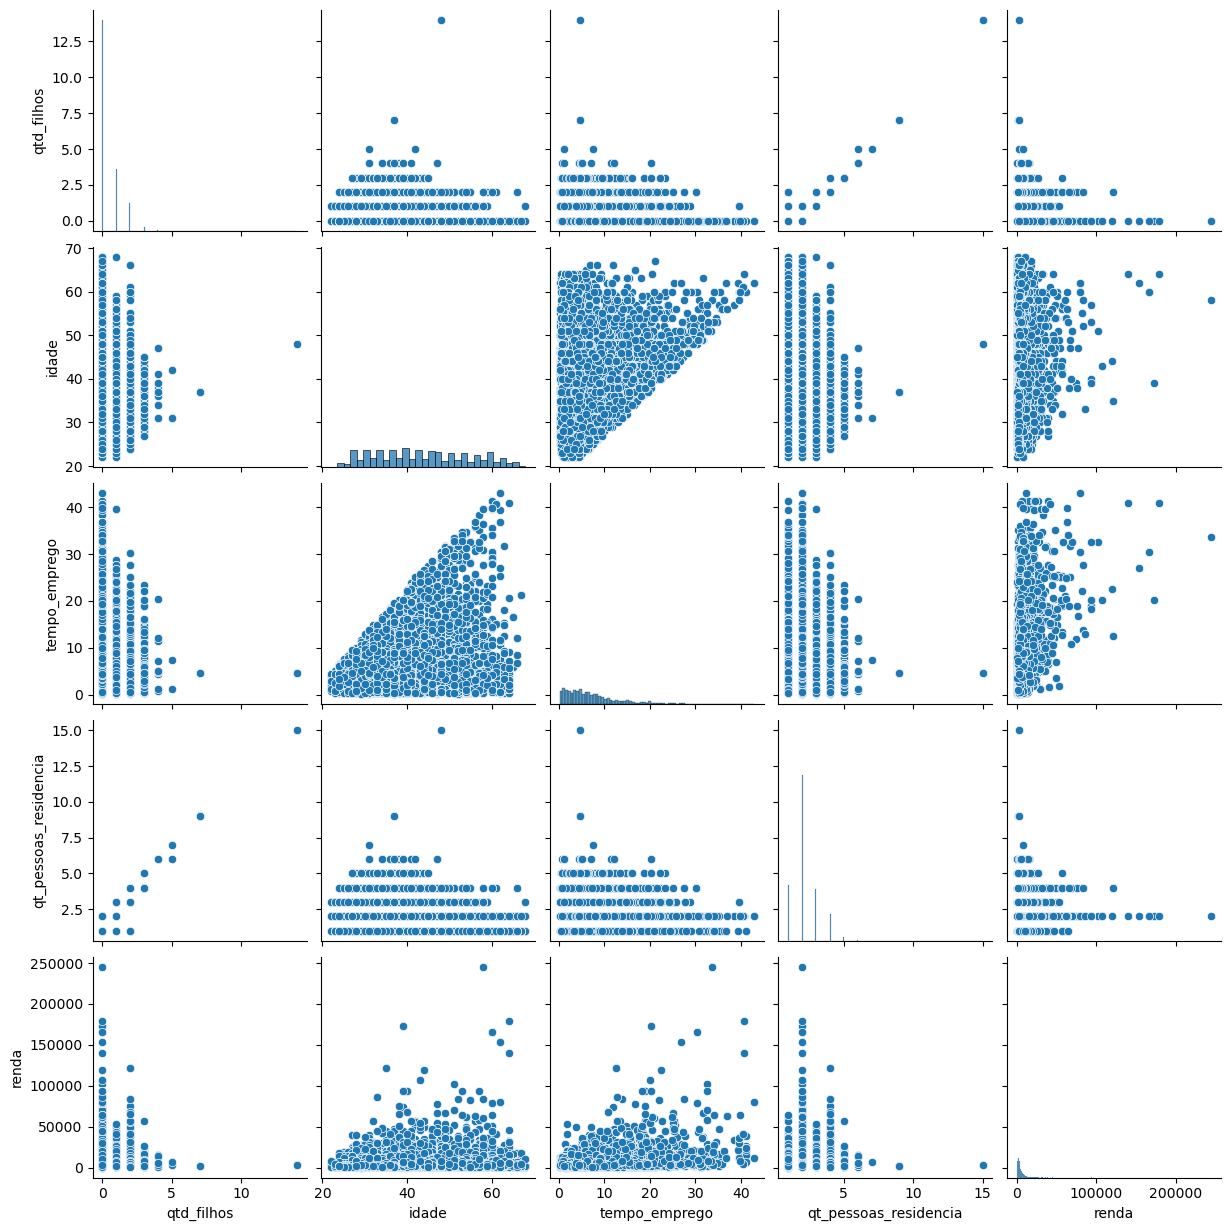

In [21]:
sns.pairplot(quantitativas)
plt.show()

A Análise da matriz de dispersão, retorna os seguintes insights:
- As pessoas com maiores rendas tendem a ter menor quantidade de filhos, sendo maior nos casos em que o cliente ou não tem filhos ou tem dois;
- Há uma maior concentração de renda nas pessoas que vivem com mais uma única na residência;
- Nos casos das variáveis 'idade' e 'tempo_emprego', a renda está, em geral, dispersa entre 0 e 50000, não tendo como afirmar diretamente a influência delas.

#### Clustermap

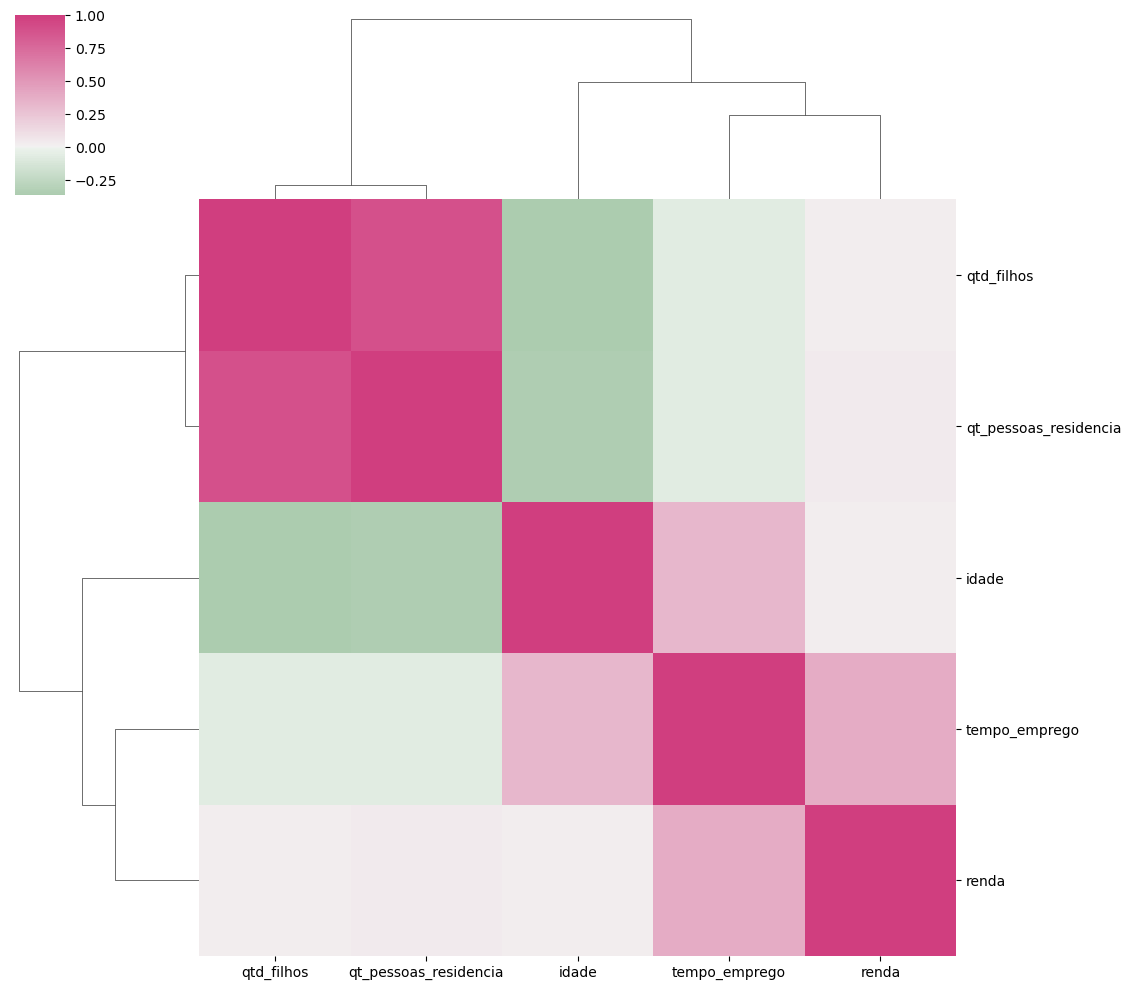

In [22]:
cmap = sns.diverging_palette(h_neg=850, h_pos=350, as_cmap=True)

cluster = sns.clustermap(quantitativas.corr(), figsize=(10, 10), center = 0, cmap=cmap)
plt.setp(cluster.ax_heatmap.get_yticklabels(), rotation=0)
plt.show()

A observação do clustermap mostra que a variável quantitativa mais correlacionada à 'renda' é a 'tempo_emprego', cuja correlação está entre 0.25 e 0.50. As três variáveis restantes estão muito próximas de zero. 

#### Matriz de Correlação 

In [23]:
quantitativas.corr()

,qtd_filhos,idade,tempo_emprego,qt_pessoas_residencia,renda
qtd_filhos,1.000000,-0.360426,-0.063220,0.889777,0.029346
idade,-0.360426,1.000000,0.321573,-0.339320,0.022435
tempo_emprego,-0.063220,0.321573,1.000000,-0.065670,0.385013
qt_pessoas_residencia,0.889777,-0.339320,-0.065670,1.000000,0.047842
renda,0.029346,0.022435,0.385013,0.047842,1.000000


Tal como foi visto no clustermap, a variável quantitativa com maior correlação com a variável resposta 'renda' é a 'tempo_emprego', visto que sua correlação é de 0.38. Nas variáveis restantes ('qtd_filhos', 'idade' e 'qt_pessoas_residencia'), a correlação varia entre 0.02 e 0.04, sendo elas extremamente baixas para afirmar que são influenciaveis à renda da pessoa.

#### Gráfico de Dispersão

Dado que a maior correlação está entre a 'renda' e o 'tempo_emprego', vejamos de forma mais aprofundada o gráfico de dispersão de tais variáveis, com a reta de tendência nele presente.

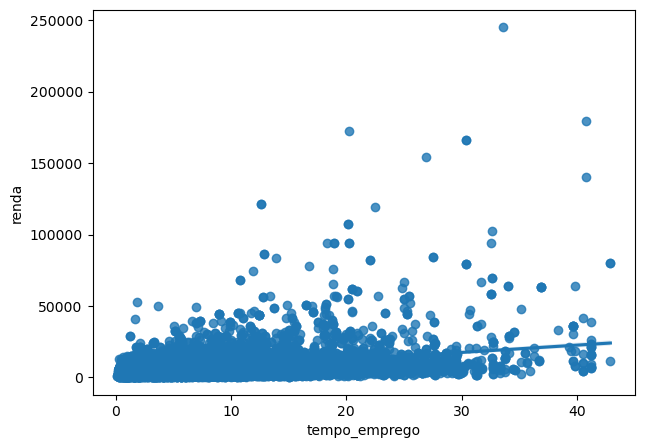

In [24]:
_ = sns.regplot(x='tempo_emprego', y='renda', data = renda)
plt.show()

É possível notar um leve crescimento na reta de tedência de acordo com o aumento do tempo de emprego da pessoa, concordando com a correlação positiva entre elas.

### Variáveis Qualitativas

Para as variáveis qualitativas, antes das análises da estabilidade temporal, verifiquemos a relação entre as variáveis booleanas ('posse_de_veiculo' e 'posse_de_imovel') com a renda.

<AxesSubplot:xlabel='posse_de_veiculo', ylabel='renda'>

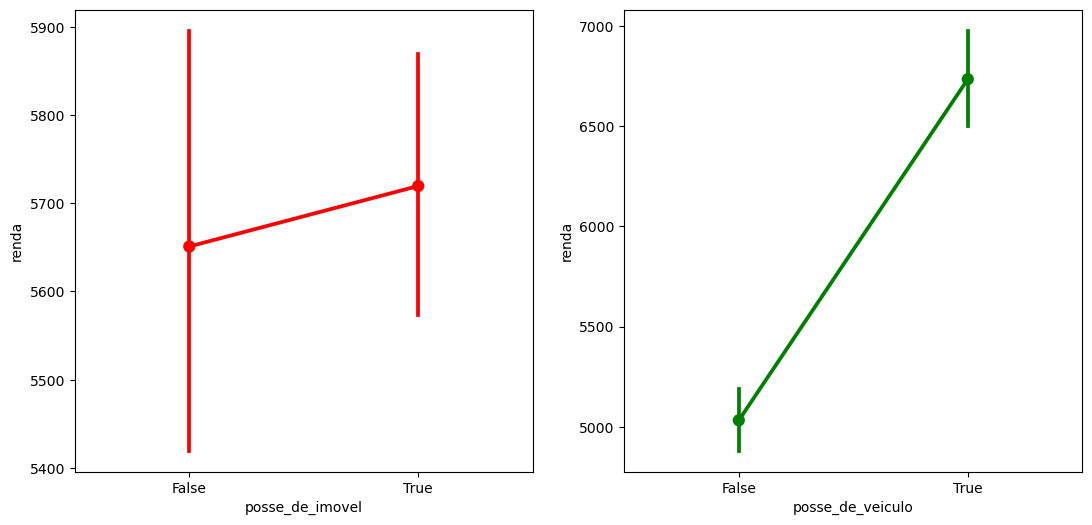

In [25]:
plt.rc('figure', figsize=(13, 6))
fig, axes = plt.subplots(1, 2)

sns.pointplot(x="posse_de_imovel", y="renda",
              data=renda, dodge=True, ci=95,
               ax = axes[0], color='red')

sns.pointplot(x="posse_de_veiculo", y="renda",
              data=renda, dodge=True, ci=95,
              ax = axes[1], color='green')

Analisando os dois gráficos, nota-se:
- Não uma diferença significativa entre a renda das pessoas que possuem imóvel em relação às que não possuem;
- A renda das pessoas que possuem veículo tende a ser maior em relação àquelas que não possuem. Considerando o intervalo de confiança, a diferença é de maior do que 1000 reais.

Dessa forma, a 'posse_de_veiculo' tende a ser uma variável preditora de renda.

Agora, verifiquemos a estabilidade temporal da média da renda de acordo com cada variável qualitativa, além da própria variável explicativa.

##### 'Sexo'

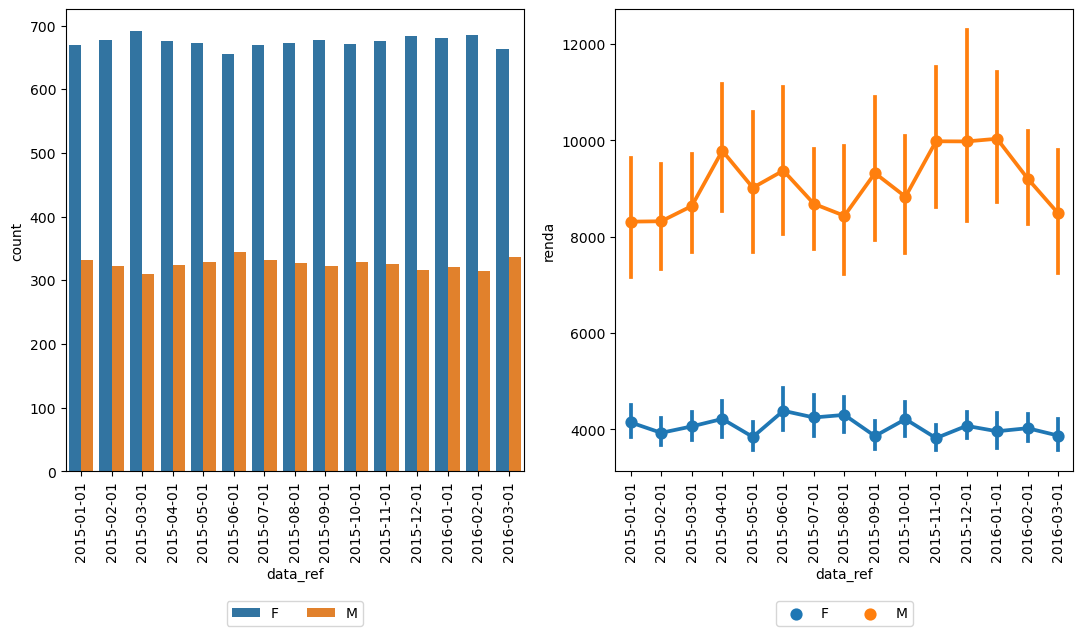

In [49]:
plt.rc('figure', figsize=(13, 6))
fig, axes = plt.subplots(1, 2)

ax0 = axes[0]
estab_sex = sns.countplot(x='data_ref', hue='sexo', data=renda, ax=ax0)
estab_sex.tick_params(axis='x', rotation=90)
estab_sex.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.35),ncol = 3)

ax1 = axes[1]
renda_sex = sns.pointplot(x='data_ref', hue='sexo', y='renda', data=renda, ax=ax1)
renda_sex.tick_params(axis='x', rotation=90)
renda_sex.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.35), ncol = 3)


As quantidades de clientes de cada sexo não se alteraram de forma significativa durante o período em análise, tendo sempre um maior número de mulheres (praticamente o dobro em relação à quantidade de homens). Por outro lado, a renda dos homens foi maior do que a das mulheres, enquanto que a renda feminina ficou em torno de 4000 reais durante o período, a renda masculina variou entre 8000 e 100000 reais (maior do que o dobro da renda feminina).

##### 'posse_de_imovel'

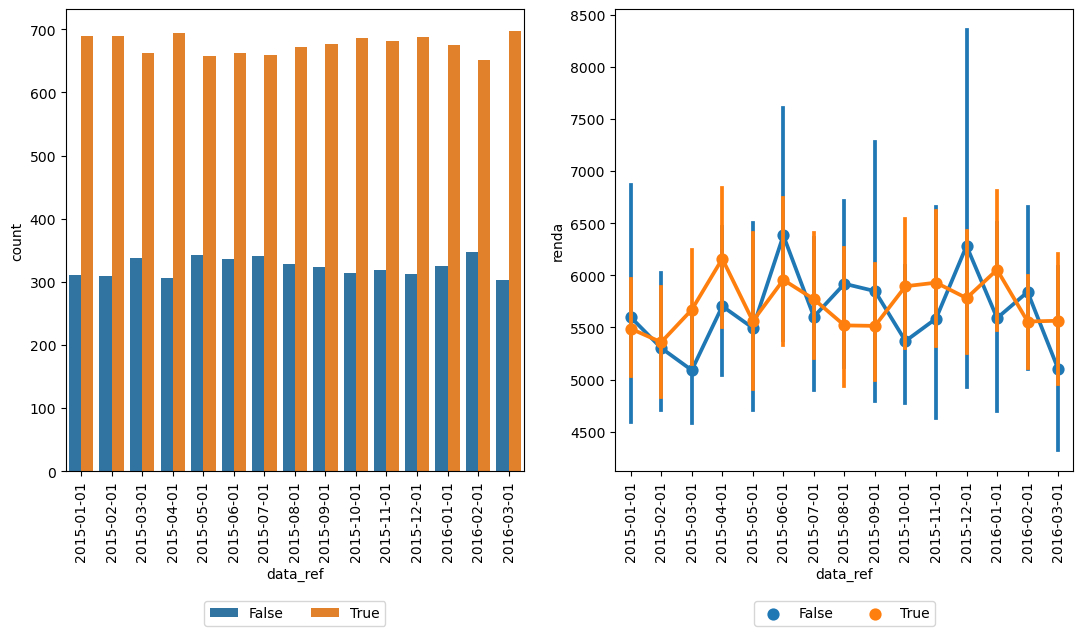

In [50]:
plt.rc('figure', figsize=(13, 6))
fig, axes = plt.subplots(1, 2)

ax0 = axes[0]
estab_sex = sns.countplot(x='data_ref', hue='posse_de_imovel', data=renda, ax=ax0)
estab_sex.tick_params(axis='x', rotation=90)
estab_sex.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.35),ncol = 3)

ax1 = axes[1]
renda_sex = sns.pointplot(x='data_ref', hue='posse_de_imovel', y='renda', data=renda, ax=ax1)
renda_sex.tick_params(axis='x', rotation=90)
renda_sex.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.35), ncol = 3)

Não houveram variações significativas nos números de clientes que têm ou não imóveis, com a maior parte deles possuindo imóvel. Também não foram notadas diferenças entre as rendas em relação a esta variável qualitativa.

##### 'posse_de_veiculo'

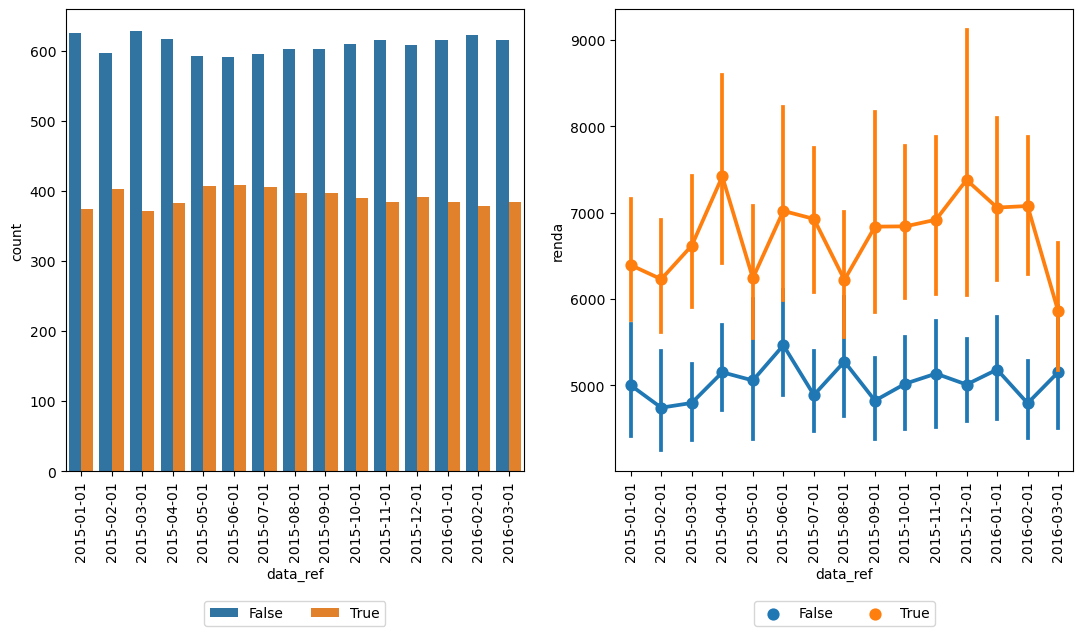

In [51]:
plt.rc('figure', figsize=(13, 6))
fig, axes = plt.subplots(1, 2)

ax0 = axes[0]
estab_sex = sns.countplot(x='data_ref', hue='posse_de_veiculo', data=renda, ax=ax0)
estab_sex.tick_params(axis='x', rotation=90)
estab_sex.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.35),ncol = 3)

ax1 = axes[1]
renda_sex = sns.pointplot(x='data_ref', hue='posse_de_veiculo', y='renda', data=renda, ax=ax1)
renda_sex.tick_params(axis='x', rotation=90)
renda_sex.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.35), ncol = 3)

A maior parte dos clientes analisados durante o intervalo de tempo não possui veículo. Além disso, a renda daqueles que possuem veículo foi maior do que os que não possem, havendo uma breve semelhança entre elas nos meses de Janeiro, Maio, Junho e Agosto de 2015 e Março de 2016.

##### 'tipo_renda'

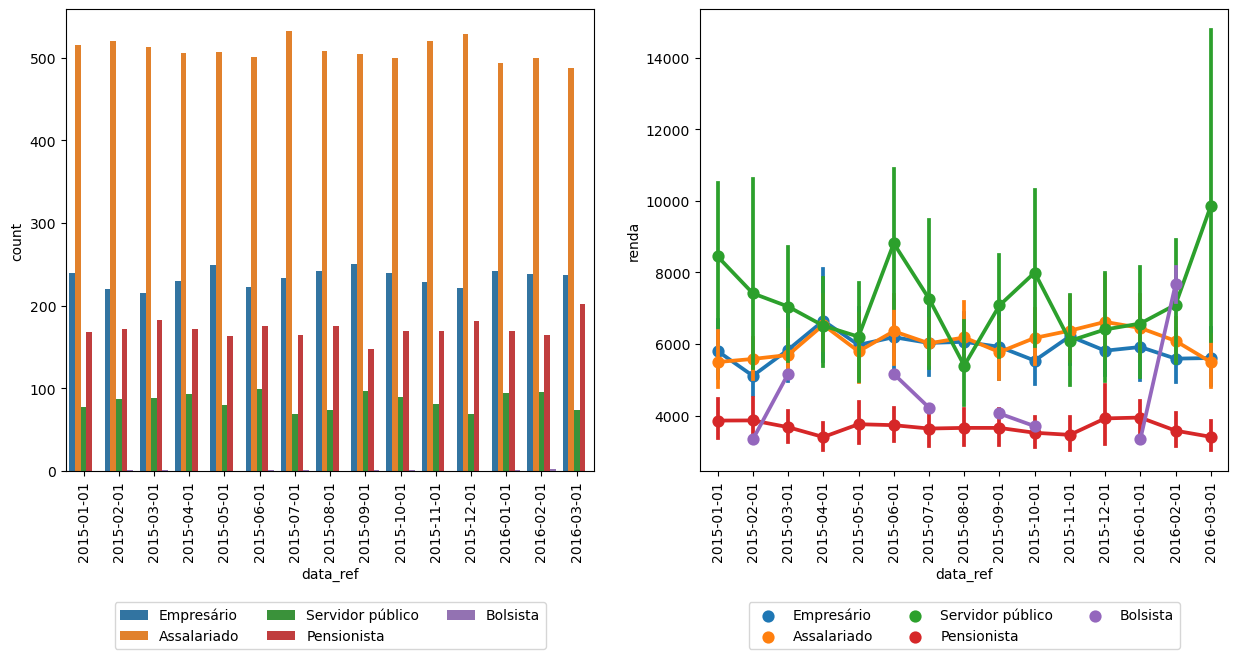

In [54]:
plt.rc('figure', figsize=(15, 6))
fig, axes = plt.subplots(1, 2)

ax0 = axes[0]
estab_sex = sns.countplot(x='data_ref', hue='tipo_renda', data=renda, ax=ax0)
estab_sex.tick_params(axis='x', rotation=90)
estab_sex.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.4),ncol = 3)

ax1 = axes[1]
renda_sex = sns.pointplot(x='data_ref', hue='tipo_renda', y='renda', data=renda, ax=ax1)
renda_sex.tick_params(axis='x', rotation=90)
renda_sex.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.4), ncol = 3)

Não foram notadas variações nas quantidades dos tipos de renda durante todo o intervalo, com maior quantidade dos clientes sendo assalariados, seguidos por empresários e pensionistas. Os que apresentaram menor renda durante todo o período foram os pensionistas, com uma média em torno de 4000 reais. Por outro lado os servidores públicos apresentaram as maiores rendas durante o período, variando entre 6000 e 10000 reais. Os empresários e assalariados tiveram rendas semelhantes, sendo em torno de 6000 reais. No caso dos bolsistas, a quantidade de clientes deste tipo foi muito pequena durante todo o tempo, além de apresentarem variações bruscas em suas rendas, indo de, aproximadamente, 4000 a 8000 reais. 

##### 'educacao'

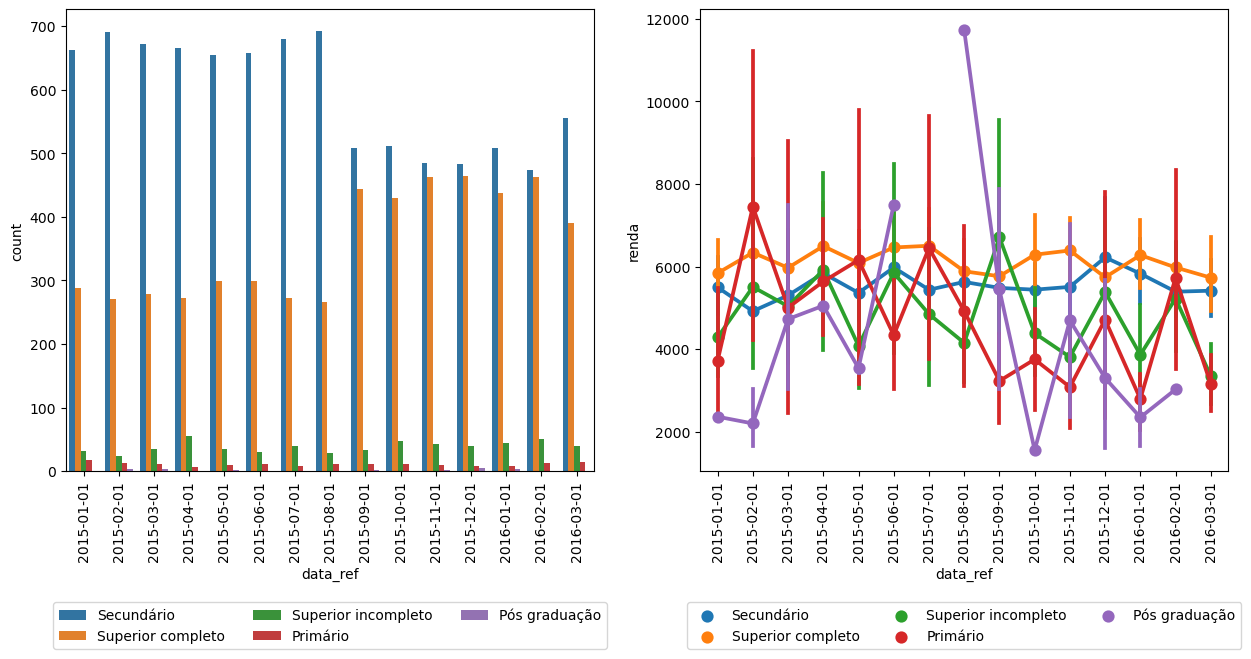

In [56]:
plt.rc('figure', figsize=(15, 6))
fig, axes = plt.subplots(1, 2)

ax0 = axes[0]
estab_sex = sns.countplot(x='data_ref', hue='educacao', data=renda, ax=ax0)
estab_sex.tick_params(axis='x', rotation=90)
estab_sex.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.4),ncol = 3)

ax1 = axes[1]
renda_sex = sns.pointplot(x='data_ref', hue='educacao', y='renda', data=renda, ax=ax1)
renda_sex.tick_params(axis='x', rotation=90)
renda_sex.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.4), ncol = 3)

O níveis de educação predominantes dos dos clientes foram secundário e superior completo, com o nível secundário sendo o mais comum entre janeiro e agosto de 2015 (variando entre 650 a 700 pessoas, enquanto que o nível superior completou ficou entre 250 e 300 pessoas). A partir de setembro, passou a haver uma proximidade entre as quantidades de clientes com nível secundário e superior completo, possivelmente, parte dos que apresentavam apenas o secundário terminaram o nível superior neste período. 

Em relação à renda, nota-se que aquelas dos níveis secundário e superior completo foram semelhantes no tempo de análise, sendo ambas próximas a 6000 reais. Os níveis restantes tiveram grandes variações na renda média, com destaque à Pós graduação, indo de 2000 a 12000 reais.

##### 'tipo_residencia'

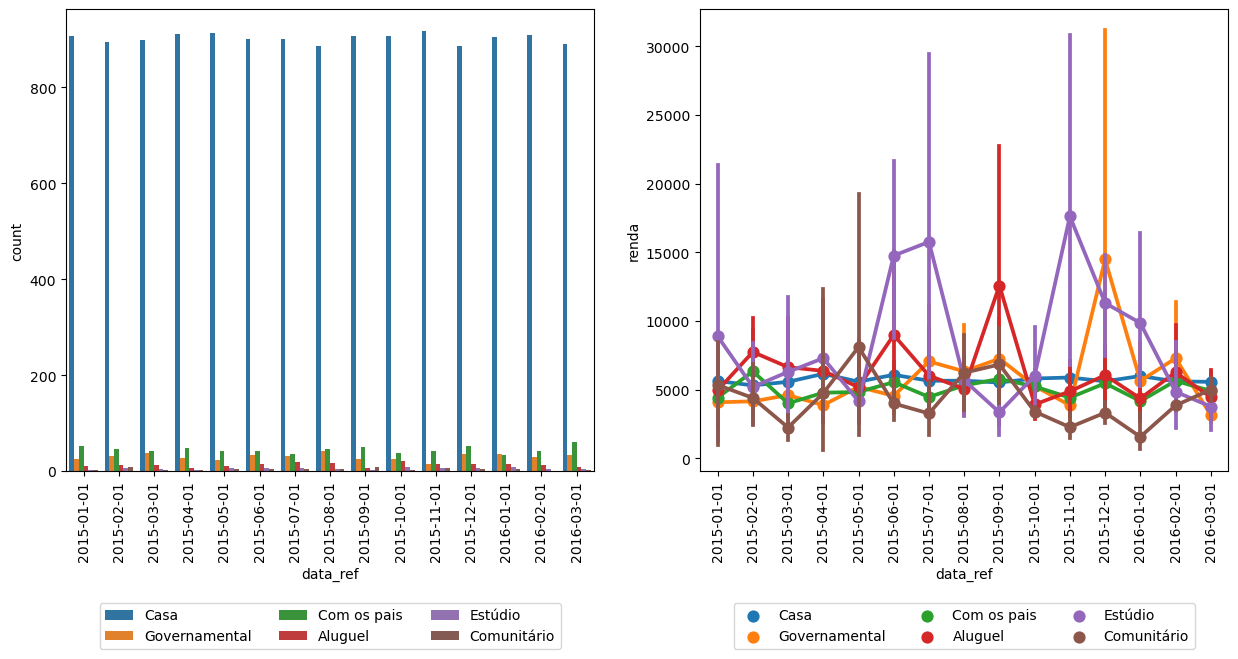

In [57]:
plt.rc('figure', figsize=(15, 6))
fig, axes = plt.subplots(1, 2)

ax0 = axes[0]
estab_sex = sns.countplot(x='data_ref', hue='tipo_residencia', data=renda, ax=ax0)
estab_sex.tick_params(axis='x', rotation=90)
estab_sex.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.4),ncol = 3)

ax1 = axes[1]
renda_sex = sns.pointplot(x='data_ref', hue='tipo_residencia', y='renda', data=renda, ax=ax1)
renda_sex.tick_params(axis='x', rotation=90)
renda_sex.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.4), ncol = 3)

Não foram notadas mudanças nas distribuições dos tipos de residência, com a maior quantidade de pessoas morando em casa (aproximadamente 90% dos clientes) durante o tempo de análise. As pessoas que apresentaram maiores rendas foram os que vivem em estúdio durante a maior parte do tempo, ainda assim, tais rendas variaram entre abaixo de 5000 a acima de 15000 reais. Também foram notadas alterações significativas nas pessoas que vivem de aluguel e aquelas que vivem em residência governamental, principalmente setembro e dezembro de 2015. Os tipos de residência restantes (com os pais, casa e comunitário) tiveram rendas mais estáveis durante este tempo, sendo próximas a 5000 reais.

##### 'estado_civil'

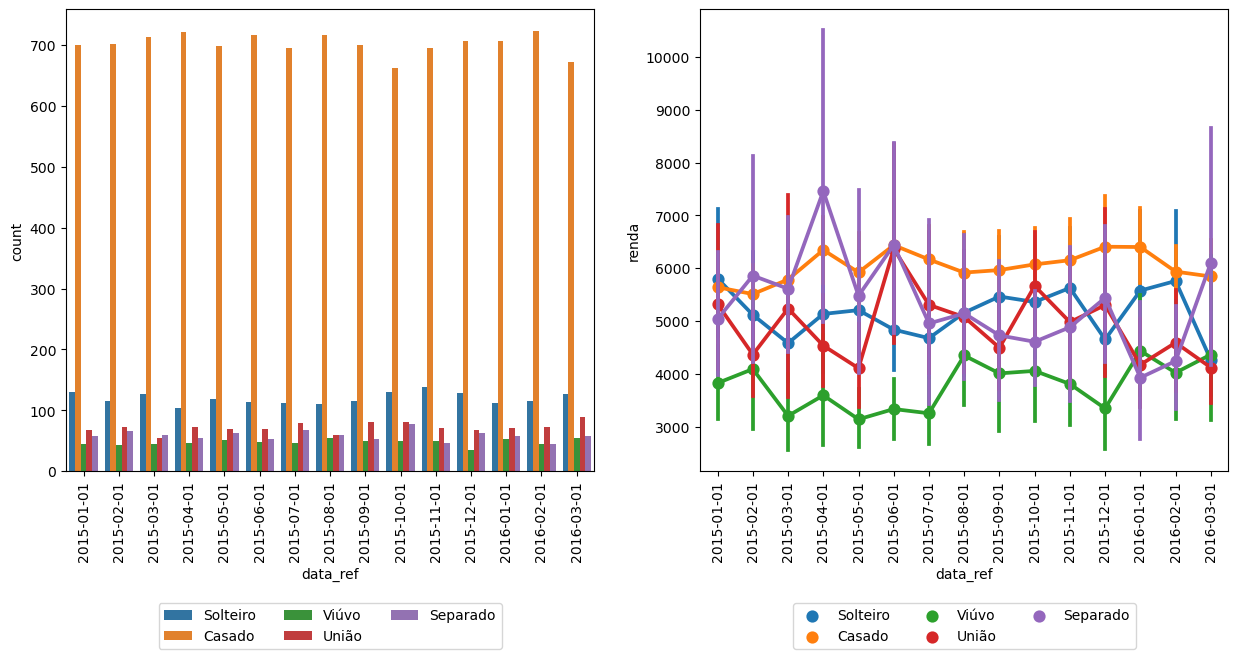

In [58]:
plt.rc('figure', figsize=(15, 6))
fig, axes = plt.subplots(1, 2)

ax0 = axes[0]
estab_sex = sns.countplot(x='data_ref', hue='estado_civil', data=renda, ax=ax0)
estab_sex.tick_params(axis='x', rotation=90)
estab_sex.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.4),ncol = 3)

ax1 = axes[1]
renda_sex = sns.pointplot(x='data_ref', hue='estado_civil', y='renda', data=renda, ax=ax1)
renda_sex.tick_params(axis='x', rotation=90)
renda_sex.legend(loc = 'lower center', bbox_to_anchor=(0.5, -.4), ncol = 3)

Nota-se que durante o tempo de análise, a maior parte das pessoas são casadas (aproximadamente 70% delas) e que não houveram mudanças significativas nas distribuições dos estados civis dos clientes. Além disso, não foram notadas diferenças significativas nas rendas de cada estado civil, com excessão do detalhe de que as pessoas viúvas foram as que tiveram menores rendas durante o ano de 2015.

## Etapa 3 Crisp-DM: Preparação dos dados
Nessa etapa realizamos tipicamente as seguintes operações com os dados:

 - **seleção**: Já temos os dados selecionados adequadamente?
 - **limpeza**: Precisaremos identificar e tratar dados faltantes
 - **construção**: construção de novas variáveis
 - **integração**: Temos apenas uma fonte de dados, não é necessário integração
 - **formatação**: Os dados já se encontram em formatos úteis?



<span style="color:red">ESCREVER AQUI</span>


## Etapa 4 Crisp-DM: Modelagem
Nessa etapa que realizaremos a construção do modelo. Os passos típicos são:


- Selecionar a técnica de modelagem

Considerando que a variável resposta 'renda' é do tipo quantitativa, será utilizada a técnica de árvores de regressão (**Decision Tree Regression**)

- Desenho do teste
- Avaliação do modelo


<span style="color:red">ESCREVER AQUI</span>


### Rodando o modelo


<span style="color:red">ESCREVER AQUI</span>


## Etapa 5 Crisp-DM: Avaliação dos resultados


<span style="color:red">ESCREVER AQUI</span>


## Etapa 6 Crisp-DM: Implantação
Nessa etapa colocamos em uso o modelo desenvolvido, normalmente implementando o modelo desenvolvido em um motor que toma as decisões com algum nível de automação.